In [1]:
# Importing the basic required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("C:\\Pandasdata\\DT_files\\covid19_brazil.xlsx")

In [3]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# recoding SARS COV2 in to different variables
df['SARS-Cov-2 exam result']=df['SARS-Cov-2 exam result'].map({'positive':1,'negative':0})

In [5]:
# transforming all items in df to numeric where pos=1,neg=0 detected=1, not_detected=0.. If it is missed
df=df.replace({'positive':1,'negative':0,'detected':1,'not_detected':0})

In [6]:
# the dataset is imbalanced
df['SARS-Cov-2 exam result'].value_counts()

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

In [7]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [8]:
# there were many NaN values, we will convert the null values in column to percentae of null
df_null_percent=df.isnull().mean().round(4)*100
df_null_percent.sort_values(ascending=False)

Prothrombin time (PT), Activity                          100.0
D-Dimer                                                  100.0
Mycoplasma pneumoniae                                    100.0
Urine - Sugar                                            100.0
Partial thromboplastin time (PTT)                        100.0
                                                         ...  
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.0
Patient addmited to regular ward (1=yes, 0=no)             0.0
SARS-Cov-2 exam result                                     0.0
Patient age quantile                                       0.0
Patient ID                                                 0.0
Length: 111, dtype: float64

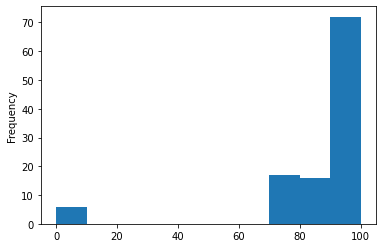

In [9]:
# plotting
df_null_percent.plot(kind='hist')

In [10]:
# We can see that there are many columns where there is >80% of missing values. We can not make a good model if we have more null
remove=df_null_percent[df_null_percent>90]
df=df[[col for col in df.columns if col not in remove]] # selecting columns in df apart from columns > 90% missing


In [11]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [12]:
# 111 to 39 ---> 72 features removed

In [13]:
# Let us check if there are any features where variance is zero
vrnce=[col for col in df.columns if col not in ['SARS-Cov-2 exam result']]
df[vrnce].var()

Patient age quantile                                     33.384166
Patient addmited to regular ward (1=yes, 0=no)            0.013804
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.008782
Patient addmited to intensive care unit (1=yes, 0=no)     0.007213
Hematocrit                                                1.001661
Hemoglobin                                                1.001661
Platelets                                                 1.001664
Mean platelet volume                                      1.001672
Red blood Cells                                           1.001664
Lymphocytes                                               1.001664
Mean corpuscular hemoglobin concentration (MCHC)          1.001664
Leukocytes                                                1.001664
Basophils                                                 1.001664
Mean corpuscular hemoglobin (MCH)                         1.001664
Eosinophils                                               1.00

In [14]:
# we can see that parainfluenza 2 is having no variance. Let us drop it
df.drop('Parainfluenza 2',axis=1,inplace=True)

In [15]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                     int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [16]:
# the features (last 19) were having binary values and have lot many null values.
# so we will add those columns and try predicting if the patient is diseased or not 
df['test']=df[df.columns[20:]].sum(axis=1)
df.loc[df['test']>1,'test']=1
df['test'].value_counts()

0.0    4884
1.0     760
Name: test, dtype: int64

In [17]:
# let us see probability
df['test'].value_counts(normalize=True)

0.0    0.865344
1.0    0.134656
Name: test, dtype: float64

In [18]:
#13% were positive for any of the last 19 test (antigen tests)

In [19]:
# let us check if the positive here in these 19 tests were registed/ found postitive for covid
df[df['test']==1]['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.981579
1    0.018421
Name: SARS-Cov-2 exam result, dtype: float64

In [20]:
# so here we found that of all tested postive in any of 19 tests only <2% were Covid Positive

In [21]:
df_clean = df.copy() # saving a copy

In [22]:
df[df.columns[20:]]=df[df.columns[20:]].fillna(0)  # filling missing values with 0 in the antigen tests

In [23]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",test
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,1,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,517c2834024f3ea,17,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,5c57d6037fe266d,4,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,c20c44766f28291,10,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# imputing null values using regression technique. impute taking help of other variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for col in df[df.columns[6:20]]:
    df_age=df.dropna(axis=0,subset=['Patient age quantile',col]).loc[:,['Patient age quantile',col]]
    missed=df[col].isnull()
    age_missing=pd.DataFrame(df['Patient age quantile'][missed])
    x=df_age[['Patient age quantile']]
    y=df_age[col]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    df.loc[df[col].isna(),col]=lr.predict(age_missing)

In [25]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",test
0,44477f75e8169d2,13,0,0,0,0,0.034267,0.022490,-0.070137,0.061030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,a46b4402a0e5696,8,0,0,0,0,-0.041190,-0.019496,0.052728,-0.040502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,0,0,0,0,-0.086463,-0.044687,0.126447,-0.101422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,0,0,0,0,0.064449,0.039284,-0.119284,0.101643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# no null values
df.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                             

In [27]:
# now our data is ready to create model and test
x=df.drop(['SARS-Cov-2 exam result','Patient ID'], axis=1)

In [28]:
y=df['SARS-Cov-2 exam result']

In [29]:
x.shape

(5644, 37)

In [30]:
y.shape

(5644,)

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [32]:
from sklearn.metrics import classification_report, roc_auc_score, recall_score, accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
print("Classification Report: \n", classification_report(y_test, y_pred))  
print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
print("Recall Score:", recall_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[1020    1]
 [  95   13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96      1021
           1       0.93      0.12      0.21       108

    accuracy                           0.91      1129
   macro avg       0.92      0.56      0.58      1129
weighted avg       0.92      0.91      0.88      1129

Accuracy Score:  0.9149689991142604
Recall Score: 0.12037037037037036
AUC:  0.5596954692204448


In [33]:
# False negative is very important here as Covid is Pandemic and is communicable so we have to work on decreasing False Negative score
#i.e increase Recall score of model
# let us try SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [34]:
x_train_smote,y_train_smote=smote.fit_sample(x_train,y_train)

In [35]:
lr.fit(x_train_smote,y_train_smote)
y_pred=lr.predict(x_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
print("Classification Report: \n", classification_report(y_test, y_pred))  
print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
print("Recall Score:", recall_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[600 421]
 [ 48  60]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.59      0.72      1021
           1       0.12      0.56      0.20       108

    accuracy                           0.58      1129
   macro avg       0.53      0.57      0.46      1129
weighted avg       0.85      0.58      0.67      1129

Accuracy Score:  0.5845881310894597
Recall Score: 0.5555555555555556
AUC:  0.5716073566220481


 no of recall increased but here the flase positive also increased. This is not acceptable. let us do more feature Engineering to improve model


In [36]:
df_clean.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",test
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0


In [37]:
# this time we will select features where nan values are less than 26 
df_cut=df_clean[df_clean.isna().sum(axis=1)<26]

In [38]:
df_cut.shape,df_clean.shape

((1588, 39), (5644, 39))

In [39]:
# 4000 rows eliminated

In [40]:
df_nulls = df_cut.isna().mean().round(4) * 100

df_nulls.sort_values(ascending=False)

Influenza A, rapid test                                  77.20
Influenza B, rapid test                                  77.20
Mean platelet volume                                     62.28
Monocytes                                                62.15
Leukocytes                                               62.09
Mean corpuscular volume (MCV)                            62.09
Eosinophils                                              62.09
Mean corpuscular hemoglobin (MCH)                        62.09
Basophils                                                62.09
Red blood cell distribution width (RDW)                  62.09
Mean corpuscular hemoglobin concentration (MCHC)         62.09
Red blood Cells                                          62.09
Platelets                                                62.09
Hemoglobin                                               62.09
Hematocrit                                               62.09
Lymphocytes                                            

In [41]:
# from leukocytes to lymphocytes all missing values are equal. they are actually results of blood test. For this model we will consider
# them to not have null in blood test results.
df_cut = df_cut[df_cut['Leukocytes'].notna()]

df_nulls = df_cut.isna().mean().round(4) * 100

df_nulls.sort_values(ascending=False)

Influenza B, rapid test                                  67.44
Influenza A, rapid test                                  67.44
CoronavirusNL63                                          39.20
Chlamydophila pneumoniae                                 39.20
Respiratory Syncytial Virus                              39.20
Influenza A                                              39.20
Influenza B                                              39.20
Parainfluenza 1                                          39.20
Rhinovirus/Enterovirus                                   39.20
Parainfluenza 3                                          39.20
Coronavirus HKU1                                         39.20
Adenovirus                                               39.20
Parainfluenza 4                                          39.20
Coronavirus229E                                          39.20
CoronavirusOC43                                          39.20
Inf A H1N1 2009                                        

In [42]:
df_cut.shape

(602, 39)

In [43]:
#Mean platelet volume & Monocytes have small missing values. we will use mean of them to impute missing

In [44]:
df_cut.loc[df_cut['Mean platelet volume '].isna(), 'Mean platelet volume '] = df_cut['Mean platelet volume '].mean()

df_cut.loc[df_cut['Monocytes'].isna(), 'Monocytes'] = df_cut['Monocytes'].mean()

In [45]:
# we will keep only columns which are blood test results
remove = [cols for cols in df_cut.columns[20:-1]]
df_keep = df_cut.drop(remove, axis=1)

In [46]:
df_keep.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),test
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,...,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0


In [47]:
df_keep.drop('Patient ID',axis=1,inplace=True)

In [48]:
df_corr=df_keep.corr()

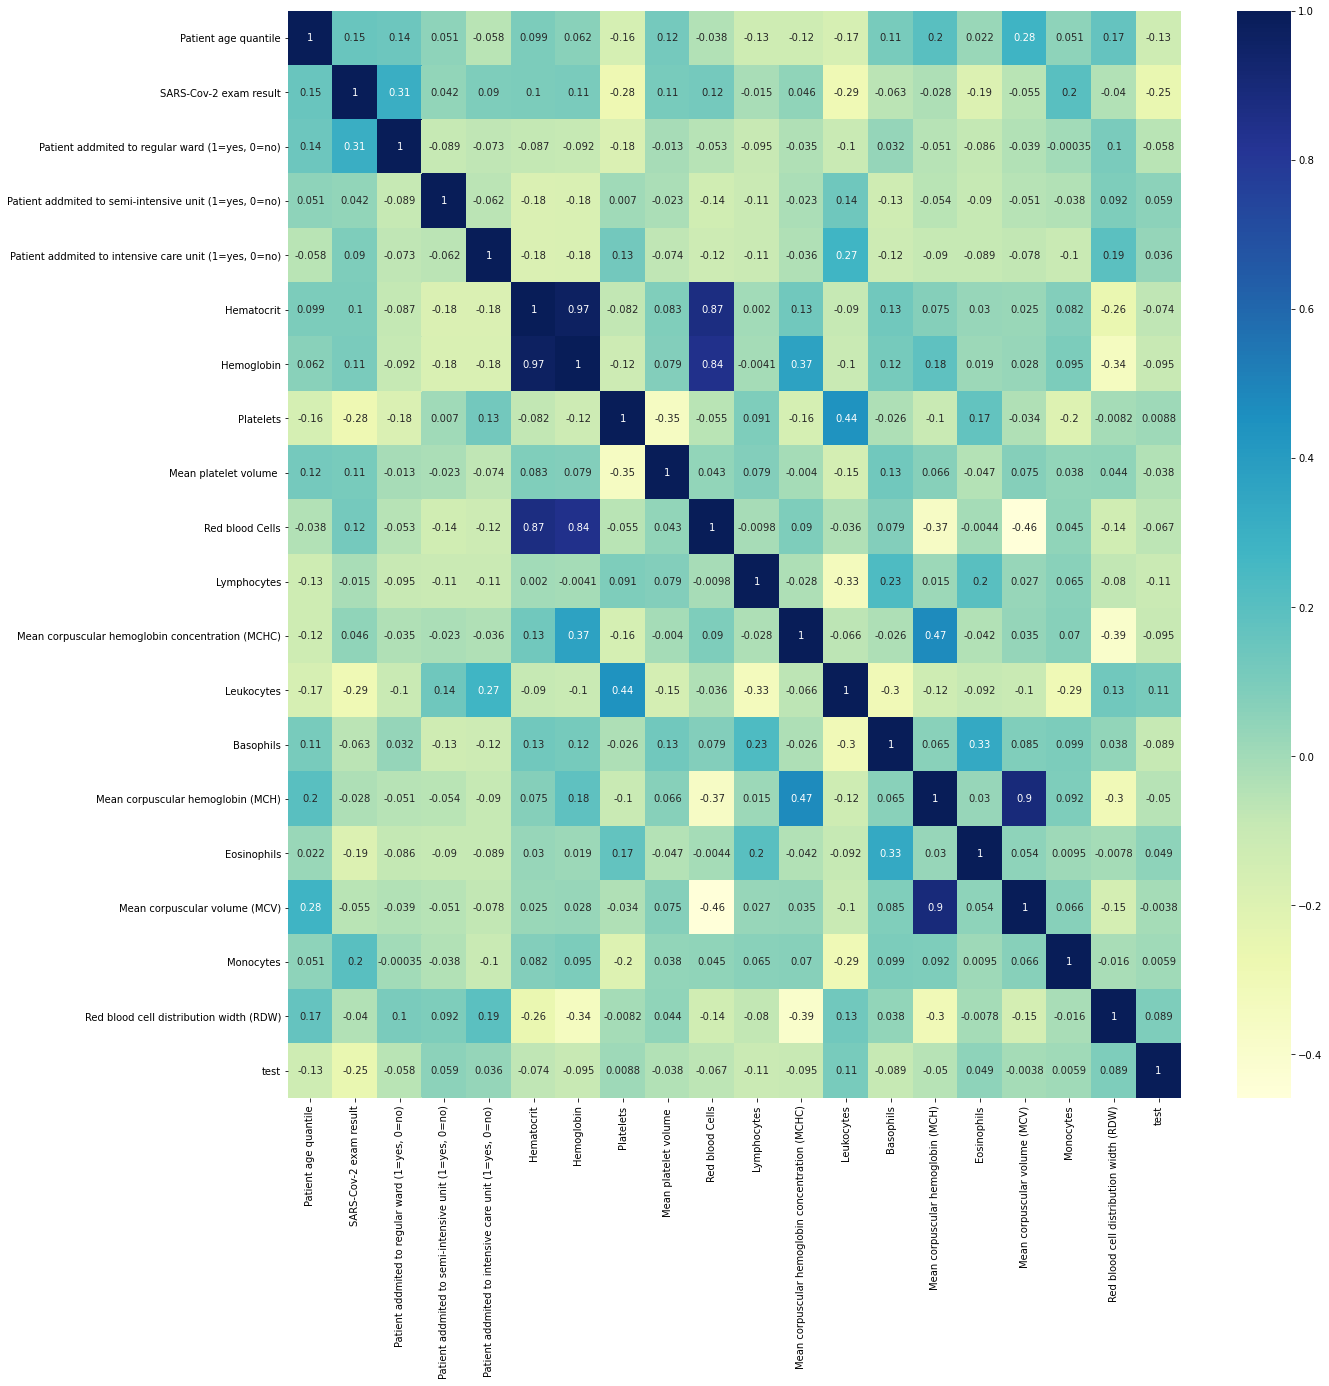

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,cmap='YlGnBu', annot=True)

In [50]:
# hematocrit and hemoglobin and almost same and have multicollinearity. We will keep RBC and remove both
#MCV and MCH are also having high correlation with each other. so will remove one, I will remove MCH

In [51]:
df_keep.drop(['Mean corpuscular hemoglobin (MCH)', 'Hematocrit', 'Hemoglobin'], axis=1)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),test
1,17,0,0,0,0,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,1.0
8,1,0,0,1,0,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,0.0
15,9,0,0,0,0,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759,-1.067355,1.0
18,11,0,0,0,0,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,1.0
22,9,0,0,0,0,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129,0.613318,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,0,0,0,0,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,0.892207,-0.474754,1.066653,0.347948,0.0
5614,19,0,0,0,0,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-0.540532,-1.976971,1.670707,0.967144,0.0
5615,15,0,0,0,0,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,-0.709090,0.005955,0.909074,-1.155812,0.0
5618,17,0,0,0,0,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,-0.582671,1.408024,1.381812,-0.448160,0.0


In [52]:
# now we will create model using this
x=df_keep.drop('SARS-Cov-2 exam result',axis=1)
y=df_keep['SARS-Cov-2 exam result']

In [53]:
x.shape,y.shape

((602, 19), (602,))

In [54]:
x=ss.fit_transform(x)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
print("Classification Report: \n", classification_report(y_test, y_pred))  
print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
print("Recall Score:", recall_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[103   1]
 [  5  12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       104
           1       0.92      0.71      0.80        17

    accuracy                           0.95       121
   macro avg       0.94      0.85      0.89       121
weighted avg       0.95      0.95      0.95       121

Accuracy Score:  0.9504132231404959
Recall Score: 0.7058823529411765
AUC:  0.848133484162896


In [56]:
# great we got 95% accuracy and very low False Negative (High Recall)
# let us SMOTE and check the accuracy and recall

In [57]:
x_train_smote,y_train_smote=smote.fit_sample(x_train,y_train)

In [58]:
lr.fit(x_train_smote,y_train_smote)
y_pred=lr.predict(x_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
print("Classification Report: \n", classification_report(y_test, y_pred))  
print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
print("Recall Score:", recall_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[92 12]
 [ 3 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       104
           1       0.54      0.82      0.65        17

    accuracy                           0.88       121
   macro avg       0.75      0.85      0.79       121
weighted avg       0.91      0.88      0.89       121

Accuracy Score:  0.8760330578512396
Recall Score: 0.8235294117647058
AUC:  0.8540723981900451


In [59]:
# reduced False Negative from 5 to 2

In [60]:
# let us use other models and check the recall and select best 

In [61]:
def low_recall(model):
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))

In [62]:
def low_recall_SMOTE(model):
    model.fit(x_train_smote, y_train_smote)  
    y_pred = model.predict(x_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42) 
low_recall(rf)

Confusion Matrix: 
 [[103   1]
 [  7  10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       104
           1       0.91      0.59      0.71        17

    accuracy                           0.93       121
   macro avg       0.92      0.79      0.84       121
weighted avg       0.93      0.93      0.93       121

Accuracy Score:  0.9338842975206612
Recall Score: 0.5882352941176471
AUC:  0.7893099547511313


In [64]:
low_recall_SMOTE(rf)

Confusion Matrix: 
 [[101   3]
 [  7  10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       104
           1       0.77      0.59      0.67        17

    accuracy                           0.92       121
   macro avg       0.85      0.78      0.81       121
weighted avg       0.91      0.92      0.91       121

Accuracy Score:  0.9173553719008265
Recall Score: 0.5882352941176471
AUC:  0.7796945701357466


In [65]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
low_recall(dt)

Confusion Matrix: 
 [[89 15]
 [ 7 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       104
           1       0.40      0.59      0.48        17

    accuracy                           0.82       121
   macro avg       0.66      0.72      0.68       121
weighted avg       0.85      0.82      0.83       121

Accuracy Score:  0.8181818181818182
Recall Score: 0.5882352941176471
AUC:  0.722002262443439


In [66]:
low_recall_SMOTE(dt)

Confusion Matrix: 
 [[88 16]
 [ 7 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.85      0.88       104
           1       0.38      0.59      0.47        17

    accuracy                           0.81       121
   macro avg       0.66      0.72      0.67       121
weighted avg       0.85      0.81      0.83       121

Accuracy Score:  0.8099173553719008
Recall Score: 0.5882352941176471
AUC:  0.7171945701357467


In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
low_recall(gbc)

Confusion Matrix: 
 [[100   4]
 [  6  11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       104
           1       0.73      0.65      0.69        17

    accuracy                           0.92       121
   macro avg       0.84      0.80      0.82       121
weighted avg       0.91      0.92      0.92       121

Accuracy Score:  0.9173553719008265
Recall Score: 0.6470588235294118
AUC:  0.8042986425339366


In [68]:
low_recall_SMOTE(gbc)

Confusion Matrix: 
 [[94 10]
 [ 4 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       104
           1       0.57      0.76      0.65        17

    accuracy                           0.88       121
   macro avg       0.76      0.83      0.79       121
weighted avg       0.90      0.88      0.89       121

Accuracy Score:  0.8842975206611571
Recall Score: 0.7647058823529411
AUC:  0.8342760180995474


In [69]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf') # of all RBF is having high recall
low_recall(svc)

Confusion Matrix: 
 [[103   1]
 [  4  13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       104
           1       0.93      0.76      0.84        17

    accuracy                           0.96       121
   macro avg       0.95      0.88      0.91       121
weighted avg       0.96      0.96      0.96       121

Accuracy Score:  0.9586776859504132
Recall Score: 0.7647058823529411
AUC:  0.8775452488687783


In [70]:
low_recall_SMOTE(svc)

Confusion Matrix: 
 [[95  9]
 [ 3 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       104
           1       0.61      0.82      0.70        17

    accuracy                           0.90       121
   macro avg       0.79      0.87      0.82       121
weighted avg       0.92      0.90      0.91       121

Accuracy Score:  0.9008264462809917
Recall Score: 0.8235294117647058
AUC:  0.8684954751131221


In [71]:
# We have got good accuracy and recall with SVC so we will select it

In [72]:
import joblib
joblib.dump(svc,'Covid_brazil.pkl')

['Covid_brazil.pkl']

In [73]:
df_keep

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),test
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,0,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0.0
5614,19,0,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0.0
5615,15,0,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0.0
5618,17,0,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0.0


In [74]:
dj=df_keep.loc[df_keep['SARS-Cov-2 exam result']==1]

In [75]:
dj

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),test
568,2,1,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144,0.0
884,15,1,1,0,0,-0.495919,-0.398276,-0.718402,-0.438097,-0.567950,-0.935404,0.244149,-0.820919,-1.140144,0.334989,-0.666950,0.226280,-0.456613,-0.978899,0.0
1108,14,1,0,0,0,-0.312811,-0.648900,-0.027502,-0.101517,-0.656101,-0.099557,-1.448681,-0.968407,-0.529226,0.021361,0.175837,0.807138,1.513128,0.347948,0.0
1162,14,1,0,0,0,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985,0.0
1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,0.595655,-0.636887,0.343725,-0.606644,-0.223767,0.125903,-0.119138,-0.014074,0.882811,-0.713529,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,18,1,1,0,0,0.602732,0.353596,-1.082694,1.581381,0.119635,-0.943933,-0.751633,-1.255035,-1.140144,0.334989,-0.835508,0.807138,-1.507141,-0.978899,0.0
5564,12,1,1,0,0,1.152058,0.604220,-0.529975,0.010677,0.930631,-0.679533,-1.647838,-0.662300,0.081693,-0.658171,-0.456253,0.126132,0.488863,-0.890442,0.0
5566,14,1,1,0,0,1.106281,1.042812,-0.253615,-0.438097,0.930631,-0.483364,0.044991,0.155841,-0.529226,0.073631,-0.793368,0.046015,-0.640455,0.171035,0.0
5585,18,1,0,0,0,1.197836,1.356092,-1.911774,1.132609,0.384090,0.966573,0.841616,-0.834833,-0.529226,1.589509,-0.582671,1.307876,1.197969,-0.094334,0.0


In [76]:
x=dj.drop('Patient addmited to intensive care unit (1=yes, 0=no)',axis=1)
y=dj['Patient addmited to intensive care unit (1=yes, 0=no)']

In [77]:
x=ss.fit_transform(x)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
print("Classification Report: \n", classification_report(y_test, y_pred))  
print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
print("Recall Score:", recall_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

Confusion Matrix: 
 [[13  2]
 [ 1  1]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.33      0.50      0.40         2

    accuracy                           0.82        17
   macro avg       0.63      0.68      0.65        17
weighted avg       0.86      0.82      0.84        17

Accuracy Score:  0.8235294117647058
Recall Score: 0.5
AUC:  0.6833333333333333


In [79]:
x_train_smote,y_train_smote=smote.fit_sample(x_train,y_train)

In [80]:
def icu_pred(model):
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))

In [81]:
def icu_smote_pred(model):
    model.fit(x_train_smote, y_train_smote)  
    y_pred = model.predict(x_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))

In [82]:
icu_pred(dt)

Confusion Matrix: 
 [[12  3]
 [ 0  2]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.40      1.00      0.57         2

    accuracy                           0.82        17
   macro avg       0.70      0.90      0.73        17
weighted avg       0.93      0.82      0.85        17

Accuracy Score:  0.8235294117647058
Recall Score: 1.0
AUC:  0.9


In [83]:
icu_pred(gbc)

Confusion Matrix: 
 [[13  2]
 [ 2  0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.00      0.00      0.00         2

    accuracy                           0.76        17
   macro avg       0.43      0.43      0.43        17
weighted avg       0.76      0.76      0.76        17

Accuracy Score:  0.7647058823529411
Recall Score: 0.0
AUC:  0.43333333333333335


In [84]:
# with this we can predict the person joining ICU with 86% AUC ROC in Decision tree Classification algorithm

In [85]:
import joblib
joblib.dump(dt,'Covid_brazil_ICU.pkl')

['Covid_brazil_ICU.pkl']